<a href="https://colab.research.google.com/github/DulanMahesh/DeepLearning_With_Tensorflow_and_Keras/blob/main/Proect_01_Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import requests
import zipfile
import matplotlib.pyplot as plt
import glob as glob
import os

In [5]:
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)

In [4]:
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

In [7]:
download_file(
    'https://www.dropbox.com/s/cprmbjb8l3olyiv/dataset_image_classification_cnn.zip?dl=1',
    'dataset_image_classification_cnn.zip'
)

unzip(zip_file='dataset_image_classification_cnn.zip')

Extracted all


In [8]:
# Store all the image paths in a list.
image_paths = glob.glob('dataset_image_classification_cnn/*.jpg')
print(image_paths)

['dataset_image_classification_cnn/dog.jpg', 'dataset_image_classification_cnn/car.jpg', 'dataset_image_classification_cnn/tiger.jpg']


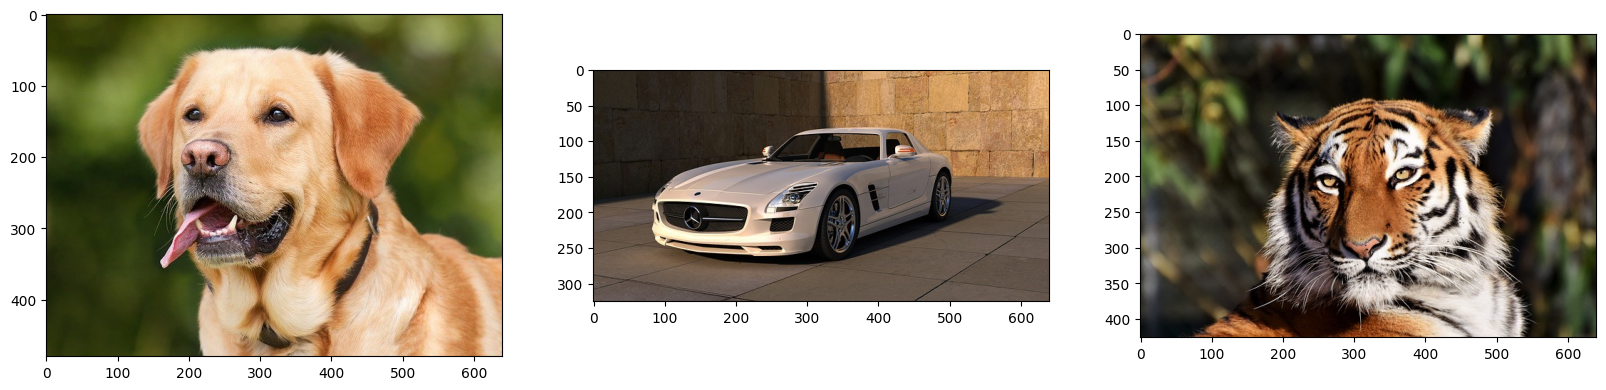

In [11]:
# display sample images

plt.figure(figsize=(20, 8))
for idx, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    plt.subplot(1, 3, idx+1)
    plt.imshow(image)
    plt.axis('on')
plt.show()

In [10]:
#load the restnet50 model

tf.keras.applications.resnet50.ResNet50(include_top=True,
                                        weights='imagenet',
                                        input_tensor=None,
                                        input_shape=None,
                                        pooling=None,
                                        classes=1000,
                                        classifier_activation='softmax',
                                       )



102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<Functional name=resnet50, built=True>

In [13]:
# Load the pre-trained ResNet50 model.
model = tf.keras.applications.resnet50.ResNet50(weights='imagenet')

model.output_shape

(None, 1000)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


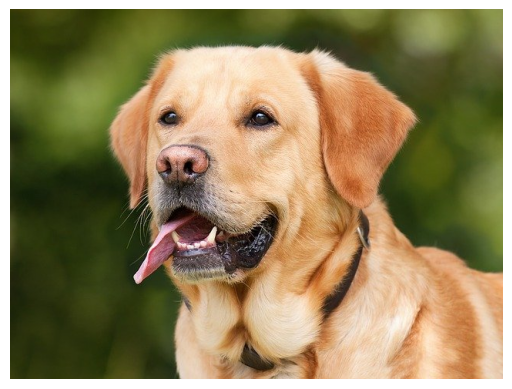

Prediction 0: Labrador_retriever, 70.46%
Prediction 1: golden_retriever, 26.02%
Prediction 2: Rhodesian_ridgeback, 1.71%
Prediction 3: Chesapeake_Bay_retriever, 0.27%
Prediction 4: Tibetan_mastiff, 0.14%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


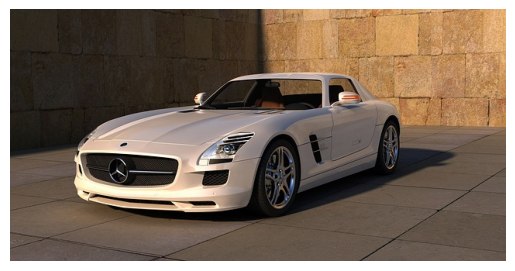

Prediction 0: sports_car, 49.18%
Prediction 1: racer, 24.73%
Prediction 2: car_wheel, 10.71%
Prediction 3: convertible, 5.65%
Prediction 4: cab, 2.90%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


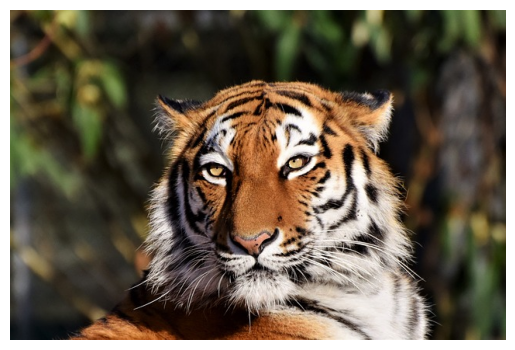

Prediction 0: tiger, 61.33%
Prediction 1: tiger_cat, 37.18%
Prediction 2: jaguar, 0.70%
Prediction 3: lynx, 0.23%
Prediction 4: leopard, 0.07%


In [14]:
# perform inference

for _, image_path in enumerate(image_paths):

    # Read image using TensorFlow.
    tf_image = tf.io.read_file(image_path)

    # Decode the above `tf_image` from a Bytes string to a Tensor.
    decoded_image = tf.image.decode_image(tf_image)

    # Resize the image.
    image_resized = tf.image.resize(decoded_image, (224, 224))

    # Add batch dimension at the beginning.
    image_batch = tf.expand_dims(image_resized, axis=0)

    # Preprocess the batched image to bring it to appropriate scale.
    image_batch = tf.keras.applications.imagenet_utils.preprocess_input(image_batch)

    # Forward pass through the model.
    predictions = model.predict(image_batch)

    # Decode the predictions from class number to actual class names.
    processed_preds = tf.keras.applications.imagenet_utils.decode_predictions(
        preds=predictions,
        top=5
    )

    # Display the image and print the top 5 predictions for each.
    plt_image = plt.imread(image_path)
    plt.imshow(plt_image)
    plt.axis('off')
    plt.show()
    for num, pred in enumerate(processed_preds[0]):
        print(f"Prediction {num}: {pred[1]}, {pred[2]*100:.2f}%")